# Task 6  - Data Visualizations and Documentation

Contributors:
* Razvan Nelepcu
* 
* 

Task deliverables:
1. Visualizations(EDA) to be used in Documentation part, using:
    * Timeseries analysis on data aggregated daily - comparative for violent events and violent media percentages.(what is the period of the analysis?)
    * sentiment analysis 
2. Final Report - format TBD, no latter than 5th September (will include tasks, resources, teams composition, process, models, metrics, recommendations, future work and other)

3. Is there a need for a PowerPoint presentation? 

### 29th August Updates

For practicing Visualization techniques, until the cleaned data is ready we can use this data: https://github.com/OmdenaAI/omdena-iraq-gun-violence/tree/main/src/tasks/task-5-Modelling/datasets

### Task plan:

Visualizations subtasks:

   1. EDA on cleaned data - histograms, countplots
   2. timeseries analysis - decomposition of timesries - trend, sesonality & residuals
   3. compared timeseries analysis - comparative for violent events and violent media posts percentages.



Documentation subtasks:

4. short story(1-2 paragraphs) about data collection
5. short story(1-2 paragraphs) about data annotation& sentiment analysis
6. short story(1-2 paragraphs) about data cleaning
7. short story(1-2 paragraphs) about network comunity analysis
8. short story(1-2 paragraphs) about modeling

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)


We found this source and we created a short database of conflicts, manually adding the exact date of the incidents: https://en.wikipedia.org/wiki/List_of_terrorist_incidents_linked_to_ISIL

In [14]:
attacks_df = pd.read_csv('E:/omdena/omdena-iraq-gun-violence/src/tasks/task-6-data-visualization-documentation/data/attacks.csv', parse_dates = True)

In [15]:
attacks_df

,Date,Location,Article,Description,dead,injured
0,2021-07-19,Baghdad,2021 Iraq Market Bombing,"In the evening of Monday, 19 July, 2021, an IS...",30.0,50.0
1,2021-01-21,Baghdad,Baghdad bombings,Islamic State of Iraq and the Levant targeted ...,32.0,110.0
2,2019-08-24,KIRKUK,-,In the night of 24 August 2019 six Iraqi peopl...,6.0,10.0
3,2018-04-12,Al-Shirqat,2018 Asdira funeral bombing,25 people were killed and 18 wounded when expl...,25.0,18.0
4,2018-01-15,Baghdad,"January 15, 2018 Baghdad bombings","On 15 January 2018, two suicide bombings took ...",38.0,105.0
5,2017-02-16,Baghdad,February 2017 Baghdad Car Bombings,Car bomb explodes in Baghdad's Baya neighborho...,54.0,63.0
6,2017-01-02,Baghdad,January 2017 Baghdad bombings,At least 70 people dead in 3 separate suicide ...,70.0,100.0
7,2016-09-09,Baghdad,9 September 2016 Baghdad bombings,A suicide bomber in a car in Baghdad killed at...,40.0,60.0
8,2016-07-03,Baghdad,July 2016 Baghdad bombings,Two bomb attacks in the district of Karrada an...,325.0,225.0
9,2016-05-11,Baghdad,11 May 2016 Baghdad bombing,Four separate car bombings in the Iraqi capita...,110.0,165.0


In [16]:
attacks_df = attacks_df.dropna()
attacks_df

,Date,Location,Article,Description,dead,injured
0,2021-07-19,Baghdad,2021 Iraq Market Bombing,"In the evening of Monday, 19 July, 2021, an IS...",30.0,50.0
1,2021-01-21,Baghdad,Baghdad bombings,Islamic State of Iraq and the Levant targeted ...,32.0,110.0
2,2019-08-24,KIRKUK,-,In the night of 24 August 2019 six Iraqi peopl...,6.0,10.0
3,2018-04-12,Al-Shirqat,2018 Asdira funeral bombing,25 people were killed and 18 wounded when expl...,25.0,18.0
4,2018-01-15,Baghdad,"January 15, 2018 Baghdad bombings","On 15 January 2018, two suicide bombings took ...",38.0,105.0
5,2017-02-16,Baghdad,February 2017 Baghdad Car Bombings,Car bomb explodes in Baghdad's Baya neighborho...,54.0,63.0
6,2017-01-02,Baghdad,January 2017 Baghdad bombings,At least 70 people dead in 3 separate suicide ...,70.0,100.0
7,2016-09-09,Baghdad,9 September 2016 Baghdad bombings,A suicide bomber in a car in Baghdad killed at...,40.0,60.0
8,2016-07-03,Baghdad,July 2016 Baghdad bombings,Two bomb attacks in the district of Karrada an...,325.0,225.0
9,2016-05-11,Baghdad,11 May 2016 Baghdad bombing,Four separate car bombings in the Iraqi capita...,110.0,165.0


In [18]:
attacks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         29 non-null     object 
 1   Location     29 non-null     object 
 2   Article      29 non-null     object 
 3   Description  29 non-null     object 
 4   dead         29 non-null     float64
 5   injured      29 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.6+ KB


In [19]:
attacks_df.index = pd.to_datetime(attacks_df.Date)
attacks_df

,Date,Location,Article,Description,dead,injured
Date,,,,,,
2021-07-19,2021-07-19,Baghdad,2021 Iraq Market Bombing,"In the evening of Monday, 19 July, 2021, an IS...",30.0,50.0
2021-01-21,2021-01-21,Baghdad,Baghdad bombings,Islamic State of Iraq and the Levant targeted ...,32.0,110.0
2019-08-24,2019-08-24,KIRKUK,-,In the night of 24 August 2019 six Iraqi peopl...,6.0,10.0
2018-04-12,2018-04-12,Al-Shirqat,2018 Asdira funeral bombing,25 people were killed and 18 wounded when expl...,25.0,18.0
2018-01-15,2018-01-15,Baghdad,"January 15, 2018 Baghdad bombings","On 15 January 2018, two suicide bombings took ...",38.0,105.0
2017-02-16,2017-02-16,Baghdad,February 2017 Baghdad Car Bombings,Car bomb explodes in Baghdad's Baya neighborho...,54.0,63.0
2017-01-02,2017-01-02,Baghdad,January 2017 Baghdad bombings,At least 70 people dead in 3 separate suicide ...,70.0,100.0
2016-09-09,2016-09-09,Baghdad,9 September 2016 Baghdad bombings,A suicide bomber in a car in Baghdad killed at...,40.0,60.0
2016-07-03,2016-07-03,Baghdad,July 2016 Baghdad bombings,Two bomb attacks in the district of Karrada an...,325.0,225.0


In [23]:
attacks_df = attacks_df.drop(['Date'], axis = 1)
attacks_df

,Location,Article,Description,dead,injured
Date,,,,,
2021-07-19,Baghdad,2021 Iraq Market Bombing,"In the evening of Monday, 19 July, 2021, an IS...",30.0,50.0
2021-01-21,Baghdad,Baghdad bombings,Islamic State of Iraq and the Levant targeted ...,32.0,110.0
2019-08-24,KIRKUK,-,In the night of 24 August 2019 six Iraqi peopl...,6.0,10.0
2018-04-12,Al-Shirqat,2018 Asdira funeral bombing,25 people were killed and 18 wounded when expl...,25.0,18.0
2018-01-15,Baghdad,"January 15, 2018 Baghdad bombings","On 15 January 2018, two suicide bombings took ...",38.0,105.0
2017-02-16,Baghdad,February 2017 Baghdad Car Bombings,Car bomb explodes in Baghdad's Baya neighborho...,54.0,63.0
2017-01-02,Baghdad,January 2017 Baghdad bombings,At least 70 people dead in 3 separate suicide ...,70.0,100.0
2016-09-09,Baghdad,9 September 2016 Baghdad bombings,A suicide bomber in a car in Baghdad killed at...,40.0,60.0
2016-07-03,Baghdad,July 2016 Baghdad bombings,Two bomb attacks in the district of Karrada an...,325.0,225.0


<AxesSubplot:xlabel='Date'>

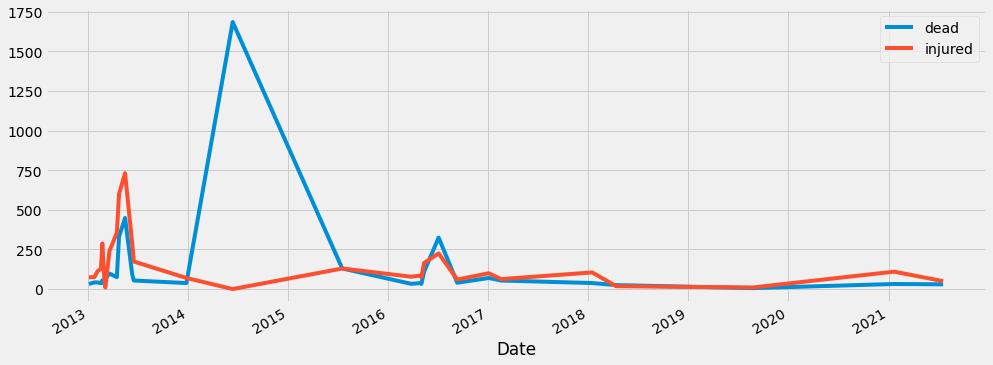

In [33]:
attacks_df.plot()

<AxesSubplot:xlabel='Location'>

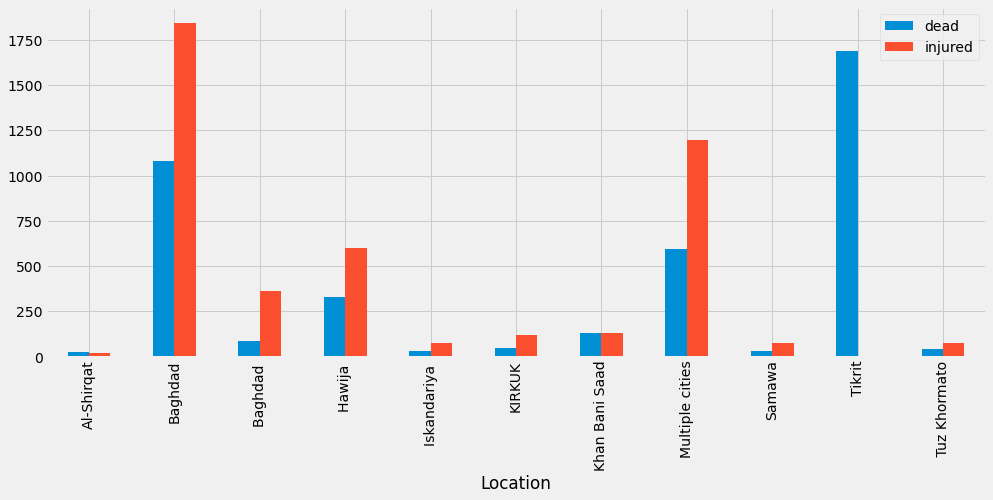

In [35]:
attacks_df.groupby('Location').sum().plot(kind = 'bar')